In [3]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
sys.path.append('/Users/albertsmith/Documents/GitHub/')
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt
sl.Defaults['parallel']=False

In [4]:
%matplotlib notebook

State-space reduction: 4->1


<IPython.core.display.Javascript object>


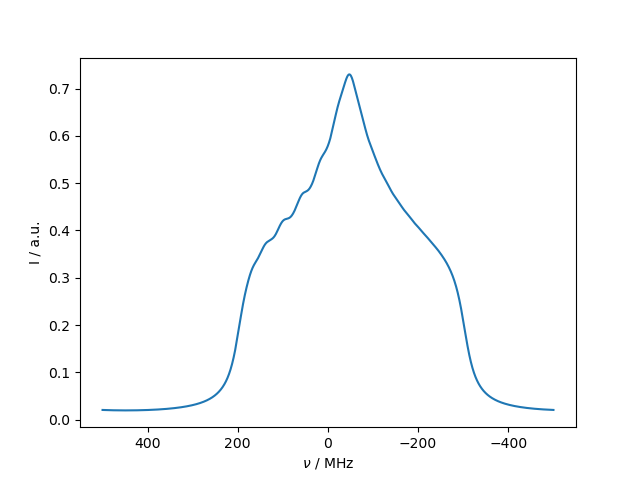

<AxesSubplot:xlabel='$\\nu$ / MHz', ylabel='I / a.u.'>

In [5]:
ex=sl.ExpSys(v0H=200,Nucs='e',vr=0,T_K=80,pwdavg=sl.PowderAvg('zcw986'))
ex.set_inter('g',i=0,gxx=2.0022,gyy=2.0059,gzz=2.0098,euler=[0,0,0])

L=ex.Liouvillian()
L.add_relax('T2',i=0,T2=400e-9)
L.add_relax('T1',i=0,T1=500e-6)

seq=L.Sequence(Dt=1e-9)
rho=sl.Rho('ex','ep')
rho.DetProp(seq,n=1024)
rho.apod_pars['LB']=40e6
rho.plot(FT=True,apodize=True,axis='MHz')

<IPython.core.display.Javascript object>


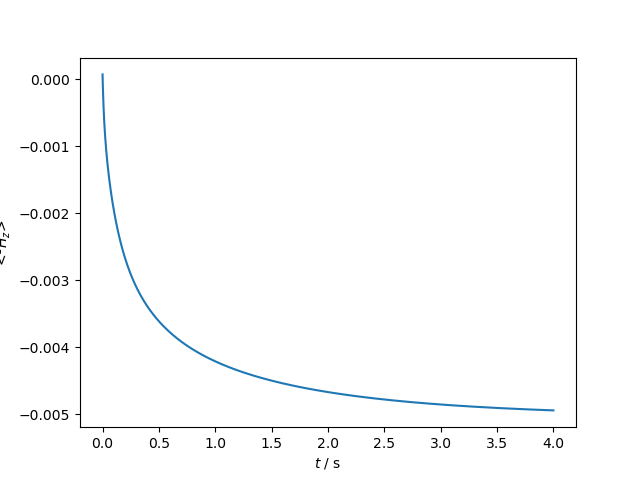

<AxesSubplot:xlabel='$t$ / s', ylabel='<$^{1}H_z$>'>

In [6]:
ex=sl.ExpSys(v0H=250,Nucs=['e-','e-','1H'],LF=[False,False,True],vr=5000,T_K=80,pwdavg=sl.PowderAvg(q=2))
ex.set_inter('hyperfine',i0=1,i1=2,Axx=-1000000,Ayy=-1000000,Azz=2000000,euler=[0,0,0])
ex.set_inter('hyperfine',i0=0,i1=2,Axx=-1000000,Ayy=-1000000,Azz=2000000,euler=[0,np.pi/2,0])
ex.set_inter('g',i=0,gxx=2.0022,gyy=2.0059,gzz=2.0098,euler=[0,0,0])
ex.set_inter('g',i=1,gxx=2.0022,gyy=2.0059,gzz=2.0098,euler=[0,np.pi/2,0])
ex.set_inter('dipole',i0=0,i1=1,delta=sl.Tools.dipole_coupling(1.33,'e-','e-'),euler=[0,77*np.pi/180,0])

L=ex.Liouvillian()
L.add_relax('T2',i=0,T2=5e-6)
L.add_relax('T2',i=1,T2=5e-6)
L.add_relax('T1',i=0,T1=250e-6)
L.add_relax('T1',i=1,T1=250e-6)
L.add_relax('T2',i=2,T2=5e-3)
L.add_relax('T1',i=2,T1=3)
L.add_relax('recovery')

seq=L.Sequence().add_channel('e-',v1=1e6,voff=-250e6)

ON=sl.Rho('Thermal',['S0z','S1z','1Hz'])
ON.DetProp(seq,n=20000)
ON.plot(axis='s',det_num=2)

State-space reduction: 64->24


<IPython.core.display.Javascript object>


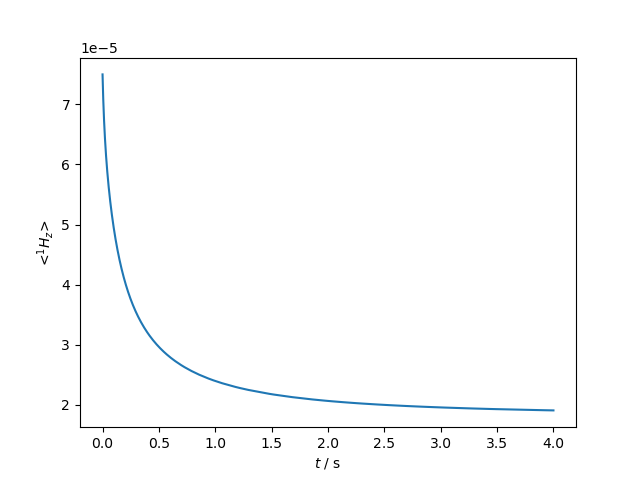

<AxesSubplot:xlabel='$t$ / s', ylabel='<$^{1}H_z$>'>

In [7]:
seq=L.Sequence()

OFF=sl.Rho('Thermal',['S0z','S1z','1Hz'])
OFF.DetProp(seq,n=20000)
OFF.plot(axis='s',det_num=2)

In [8]:
print(f'Apparent enhancement: {(ON.I[-1][-1]/OFF.I[-1][-1]).real:.0f}')
print(f'Real enhancement: {(ON.I[-1][-1]/ex.Peq[-1]).real:.0f}')

Apparent enhancement: -259
Real enhancement: -66


<IPython.core.display.Javascript object>


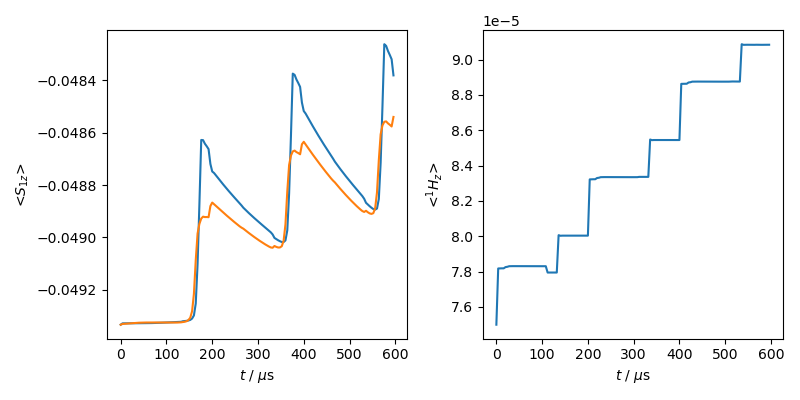

Prop: 50 steps per every 1 rotor period


In [9]:
ex=sl.ExpSys(v0H=250,Nucs=['e-','e-','1H'],LF=[False,False,True],vr=5000,T_K=80,pwdavg=sl.PowderAvg(q=2)[30])
ex.set_inter('hyperfine',i0=1,i1=2,Axx=-1000000,Ayy=-1000000,Azz=2000000,euler=[0,0,0])
ex.set_inter('hyperfine',i0=0,i1=2,Axx=-1000000,Ayy=-1000000,Azz=2000000,euler=[0,np.pi/2,0])
ex.set_inter('g',i=0,gxx=2.0022,gyy=2.0059,gzz=2.0098,euler=[0,0,0])
ex.set_inter('g',i=1,gxx=2.0022,gyy=2.0059,gzz=2.0098,euler=[0,np.pi/2,0])
ex.set_inter('dipole',i0=0,i1=1,delta=sl.Tools.dipole_coupling(1.33,'e-','e-'),euler=[0,77*np.pi/180,0])

L=ex.Liouvillian()
L.add_relax('T2',i=0,T2=5e-6)
L.add_relax('T2',i=1,T2=5e-6)
L.add_relax('T1',i=0,T1=250e-6)
L.add_relax('T1',i=1,T1=250e-6)
L.add_relax('T2',i=2,T2=5e-3)
L.add_relax('T1',i=2,T1=3)
L.add_relax('recovery')

seq=L.Sequence().add_channel('e-',v1=1e6,voff=250e6)

fig,ax=plt.subplots(1,2)

rho=sl.Rho('Thermal',['S0z','S1z','1Hz'])
rho.clear()
rho.DetProp(seq,n=150,n_per_seq=50)
rho.plot(axis='us',ax=ax[0],det_num=0)
rho.plot(axis='us',ax=ax[0],det_num=1)
rho.plot(axis='us',ax=ax[1],det_num=2)
fig.set_size_inches([8,4])
fig.tight_layout()

<IPython.core.display.Javascript object>


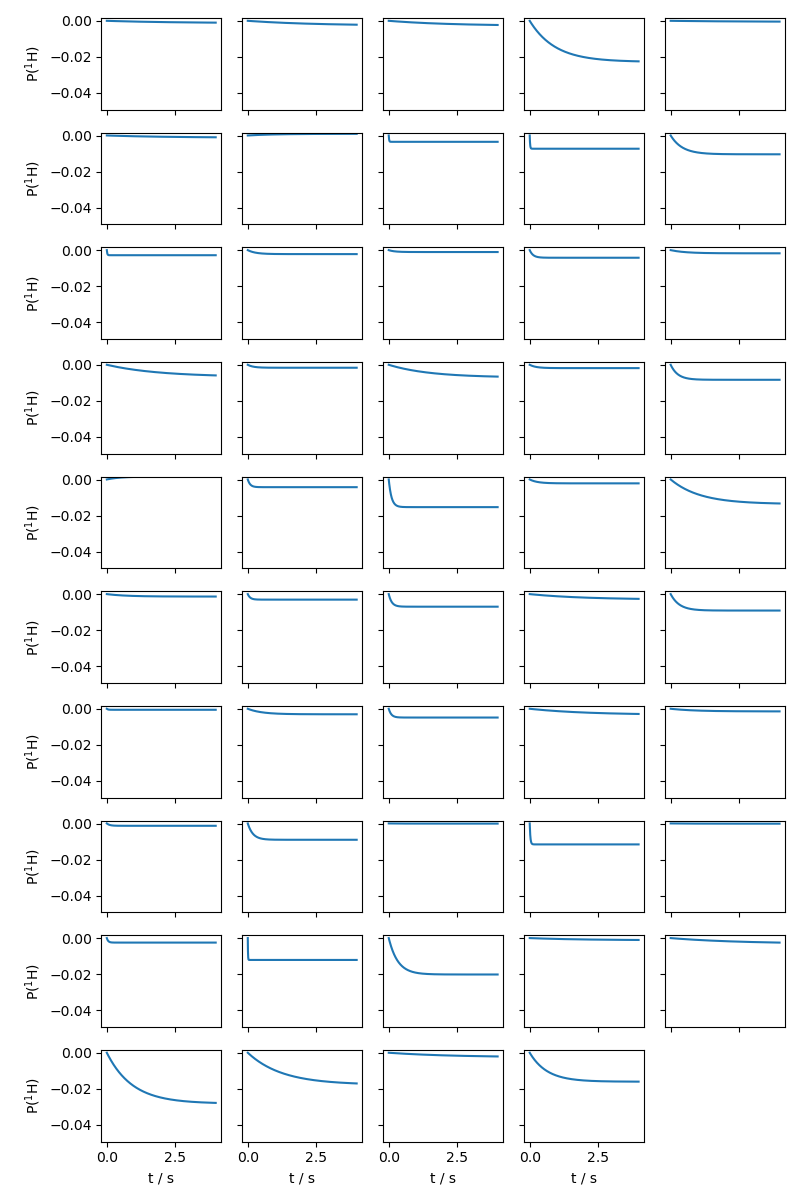

In [10]:
fig=plt.figure()
ax=[fig.add_subplot(10,5,k+1) for k in range(len(ON.Ipwd))]
for k,a in enumerate(ax):
    a.plot(ON.t_axis,ON.Ipwd[k][-1].real)
    a.set_ylim([ON.Ipwd.real.min(),ON.Ipwd.real.max()])
    if a.is_first_col():
        a.set_ylabel(r'P($^1$H)')
    else:
        a.set_yticklabels([])
    if a.is_last_row():
        a.set_xlabel('t / s')
    else:
        a.set_xticklabels([])
fig.set_size_inches([8,12])
fig.tight_layout()

In [ ]:
a.i